In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pickle
from tqdm import tqdm

In [2]:
import sys
sys.path
sys.path[0] = "d:\\projects\\affect\\TUCORE-GCN\\"
sys.path
if __name__=="main": print()

In [39]:
import datasets
new_train = datasets.load_from_disk("../datasets/DialogRE/data_final/")

In [5]:
from data import TUCOREGCNDataloader, TUCOREGCNDataset
from models.BERT import tokenization
tokenizer = tokenization.FullTokenizer(vocab_file="../pre-trained_model/BERT/vocab.txt", do_lower_case=True)
old_train_data = TUCOREGCNDataset(src_file="../datasets/DialogRE/", save_file="../datasets/DialogRE/dev_BERT.pkl", max_seq_length=512, tokenizer=tokenizer, n_class=36, encoder_type="BERT")

d:\projects\affect\TUCORE-GCN\.venv\Lib\site-packages\dgl\dgl.dll
Reading data from ../datasets/DialogRE/.
load preprocessed data from ../datasets/DialogRE/dev_BERT.pkl.


In [6]:
old_train = TUCOREGCNDataloader(old_train_data, 12, False)

In [40]:
new_train_sample = new_train['test'].shard(5997//12, 0)
old_train_sample = next(enumerate(old_train))[1]

In [ ]:
datasets.

In [13]:
new_train_sample[0].keys()

dict_keys(['tokens', 'label_ids', 'input_ids', 'input_mask', 'segment_ids', 'speaker_ids', 'mention_ids', 'turn_masks', 'graph'])

In [14]:
old_train_sample.keys()

dict_keys(['input_ids', 'segment_ids', 'input_masks', 'mention_ids', 'speaker_ids', 'label_ids', 'turn_masks', 'graphs'])

In [42]:
str(new_train_sample[0]['tokens'])

'[\'[CLS]\', \'{speaker_1}\', \':\', \'hey\', \',\', \'do\', \'you\', \'guys\', \'have\', \'.\', \'.\', \'.\', \'.\', \'.\', \'.\', \'hi\', \'.\', \'{entity_2}\', \':\', \'hi\', \'.\', \'{speaker_1}\', \':\', \'where\', \'you\', \'goin\', "\'", \'?\', \'{entity_2}\', \':\', \'i\', \'uh\', \',\', \'i\', \'just\', \'got\', \'back\', \'from\', \'uh\', \',\', \'from\', \'{entity_1}\', "\'", \'s\', \'.\', \'{speaker_1}\', \':\', \'oh\', \'.\', \'{entity_2}\', \':\', \'no\', \',\', \'no\', \',\', \'uh\', \',\', \'it\', "\'", \'s\', \'not\', \'what\', \'you\', \'think\', \'.\', \'it\', "\'", \'s\', \'um\', \'the\', \'other\', \'thing\', \'.\', \'{speaker_1}\', \':\', \'well\', \',\', \'what\', "\'", \'s\', \'the\', \'other\', \'thing\', \',\', \'what\', \'do\', \'i\', \'think\', \'?\', \'{entity_2}\', \':\', \'well\', \',\', \'uh\', \'.\', \'{speaker_3}\', \':\', \'he\', \'broke\', \'up\', \'with\', \'{entity_1}\', \'.\', \'well\', \',\', \'go\', \'hug\', \'her\', \',\', \'for\', \'god\', "\'

In [24]:
str(new_train_sample[0]['input_ids'])

'[101, 1, 1024, 4931, 999, 11, 1024, 4931, 999, 1, 1024, 2017, 4364, 3201, 2000, 2175, 1029, 11, 1024, 2025, 3243, 1012, 9018, 1005, 1055, 2145, 2012, 1996, 11090, 1010, 1998, 1045, 1005, 1049, 2074, 5131, 14743, 1012, 1, 1024, 12043, 999, 2017, 1005, 2128, 2025, 2635, 2115, 6331, 1029, 11, 1024, 2017, 1005, 2128, 2025, 4011, 2000, 2202, 2008, 1012, 4661, 1010, 2009, 1005, 1055, 1037, 2047, 9025, 1010, 2054, 2024, 2017, 6069, 2079, 2007, 2009, 1029, 1, 1024, 4553, 2055, 4441, 1012, 1012, 1012, 1, 1024, 4931, 999, 3, 1024, 2061, 1010, 2106, 2017, 2831, 2000, 9558, 1029, 1, 1024, 7910, 1010, 2053, 1012, 1012, 1012, 2053, 1012, 1045, 2481, 1005, 1056, 2424, 2032, 1012, 1045, 1005, 1049, 2074, 6069, 2831, 2000, 2032, 2006, 1996, 4946, 1012, 3, 1024, 3398, 1010, 4165, 2066, 1037, 2204, 2801, 1012, 1012, 1012, 2852, 1012, 21500, 3917, 999, 1, 1024, 2644, 2009, 999, 3, 1024, 8065, 1, 1024, 2017, 1005, 2128, 18294, 999, 102, 11, 102, 12, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [36]:
str(old_train_sample['input_ids'][0].cpu().numpy().tolist())

'[101, 3, 1024, 4931, 999, 5882, 1016, 1024, 4931, 1012, 5882, 1017, 1024, 4931, 1010, 2158, 1012, 2054, 1005, 1055, 2039, 1029, 3, 1024, 2672, 2017, 2064, 2425, 2033, 1012, 2026, 4005, 2052, 2066, 2000, 2113, 2339, 1045, 2134, 1005, 1056, 2265, 2039, 2012, 1996, 14597, 1045, 2134, 1005, 1056, 2113, 1045, 2018, 2651, 1012, 1996, 2034, 2204, 2518, 2016, 4152, 2033, 1999, 3134, 1012, 2129, 2071, 2017, 2025, 2507, 2033, 1996, 4471, 1029, 999, 5882, 1017, 1024, 2092, 1010, 1045, 1005, 2222, 2425, 8038, 1045, 2079, 5959, 8056, 1010, 2021, 1010, 6289, 1010, 2009, 2347, 1005, 1056, 2033, 1012, 5882, 1016, 1024, 2748, 1010, 2009, 2001, 999, 2009, 2001, 2032, 999, 7910, 9616, 999, 3100, 1010, 2009, 2001, 2033, 999, 3, 1024, 2129, 2003, 2009, 2017, 1029, 5882, 1016, 1024, 2092, 1010, 2009, 2001, 2074, 1010, 2009, 2001, 2035, 2061, 4689, 1010, 2017, 2113, 1012, 1045, 2812, 1010, 13814, 2001, 1999, 1996, 9346, 1010, 10320, 2000, 2184, 1010, 1998, 2002, 2001, 2039, 2000, 1021, 1998, 1045, 2910, 100

In [ ]:
'[101, 1, 1024, 4931, 999, 11, 1024, 4931, 999, 1, 1024, 2017, 4364, 3201, 2000, 2175, 1029, 11, 1024, 2025, 3243, 1012, 9018, 1005, 1055, 2145, 2012, 1996, 11090, 1010, 1998, 1045, 1005, 1049, 2074, 5131, 14743, 1012, 1, 1024, 12043, 999, 2017, 1005, 2128, 2025, 2635, 2115, 6331, 1029, 11, 1024, 2017, 1005, 2128, 2025, 4011, 2000, 2202, 2008, 1012, 4661, 1010, 2009, 1005, 1055, 1037, 2047, 9025, 1010, 2054, 2024, 2017, 6069, 2079, 2007, 2009, 1029, 1, 1024, 4553, 2055, 4441, 1012, 1012, 1012, 1, 1024, 4931, 999, 3, 1024, 2061, 1010, 2106, 2017, 2831, 2000, 9558, 1029, 1, 1024, 7910, 1010, 2053, 1012, 1012, 1012, 2053, 1012, 1045, 2481, 1005, 1056, 2424, 2032, 1012, 1045, 1005, 1049, 2074, 6069, 2831, 2000, 2032, 2006, 1996, 4946, 1012, 3, 1024, 3398, 1010, 4165, 2066, 1037, 2204, 2801, 1012, 1012, 1012, 2852, 1012, 21500, 3917, 999, 1, 1024, 2644, 2009, 999, 3, 1024, 8065, 1, 1024, 2017, 1005, 2128, 18294, 999, 102, 11, 102, 12, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'


In [ ]:
'[101, 5882, 1015, 1024, 4931, 999, 2, 1024, 4931, 1012, 5882, 1017, 1024, 4931, 1010, 2158, 1012, 2054, 1005, 1055, 2039, 1029, 5882, 1015, 1024, 2672, 2017, 2064, 2425, 2033, 1012, 2026, 4005, 2052, 2066, 2000, 2113, 2339, 1045, 2134, 1005, 1056, 2265, 2039, 2012, 1996, 14597, 1045, 2134, 1005, 1056, 2113, 1045, 2018, 2651, 1012, 1996, 2034, 2204, 2518, 2016, 4152, 2033, 1999, 3134, 1012, 2129, 2071, 2017, 2025, 2507, 2033, 1996, 4471, 1029, 999, 5882, 1017, 1024, 2092, 1010, 1045, 1005, 2222, 2425, 8038, 1045, 2079, 5959, 8056, 1010, 2021, 1010, 6289, 1010, 2009, 2347, 1005, 1056, 2033, 1012, 2, 1024, 2748, 1010, 2009, 2001, 999, 2009, 2001, 2032, 999, 7910, 9616, 999, 3100, 1010, 2009, 2001, 2033, 999, 5882, 1015, 1024, 2129, 2003, 2009, 2017, 1029, 2, 1024, 2092, 1010, 2009, 2001, 2074, 1010, 2009, 2001, 2035, 2061, 4689, 1010, 2017, 2113, 1012, 1045, 2812, 1010, 13814, 2001, 1999, 1996, 9346, 1010, 10320, 2000, 2184, 1010, 1998, 2002, 2001, 2039, 2000, 1021, 1998, 1045, 2910, 1005, 1056, 2179, 1037, 2173, 2000, 5342, 2664, 1012, 1045, 1011, 1045, 1011, 1045, 3214, 2000, 2425, 2017, 1010, 1998, 1045, 2626, 2009, 2035, 2091, 2006, 2026, 2192, 1012, 2156, 1010, 2035, 1997, 2009, 1012, 5882, 1015, 1024, 15624, 1010, 2008, 1005, 1055, 2026, 14597, 1012, 5882, 1018, 1024, 2156, 1010, 2085, 2023, 2003, 2339, 1045, 2562, 3602, 15455, 2015, 7249, 1012, 2, 1024, 15624, 1010, 1998, 2008, 1005, 1055, 2339, 2057, 2123, 1005, 1056, 13260, 2017, 2000, 2377, 1012, 5882, 1019, 1024, 2054, 2003, 1996, 2307, 10576, 2182, 1029, 2017, 2175, 2131, 4426, 2178, 6098, 1012, 5882, 1015, 1024, 2092, 1010, 28517, 6216, 2699, 1010, 2017, 2113, 1012, 1996, 9179, 2472, 2409, 2014, 2008, 1045, 4771, 2026, 3382, 1012, 2, 1024, 2008, 2003, 15571, 1012, 1045, 1005, 2222, 2655, 2014, 1998, 2425, 2014, 2009, 2001, 6135, 2026, 6346, 1012, 5882, 1015, 1024, 6887, 4402, 5910, 1010, 2017, 2064, 1005, 1056, 2079, 2008, 1012, 1996, 9179, 2472, 2987, 1005, 1056, 2831, 2000, 2814, 1010, 2016, 2069, 7566, 2000, 6074, 1012, 2, 1024, 2054, 1037, 6517, 2210, 2166, 2016, 2442, 2599, 1012, 3100, 1010, 1051, 11631, 1012, 5882, 1015, 1024, 2054, 1010, 2054, 2024, 2017, 2725, 1029, 2054, 2024, 2017, 2725, 1029, 2, 1024, 2053, 1010, 2053, 1010, 2053, 1010, 1045, 2113, 1010, 1045, 2113, 1010, 1051, 11631, 1012, 1005, 7632, 1010, 2023, 2003, 5736, 27610, 1010, 2013, 18188, 23176, 4710, 1005, 1055, 2436, 1012, 8529, 1010, 2003, 8529, 1010, 5754, 2045, 2005, 18188, 1010, 2016, 1005, 2222, 2113, 2054, 2009, 1005, 1055, 2055, 1012, 1005, 5882, 1015, 1024, 6865, 2039, 1010, 6865, 2039, 1012, 2, 1024, 1005, 8194, 999, 7632, 1012, 4952, 2057, 2288, 1037, 3291, 2007, 9558, 13012, 10322, 25443, 1010, 4593, 2002, 4771, 2010, 14597, 1012, 2040, 2106, 2017, 3713, 2000, 1999, 2026, 2436, 1029, 28517, 6216, 1010, 2053, 1010, 1045, 2123, 1005, 1056, 2113, 2054, 1045, 1005, 1049, 2183, 2000, 2079, 2007, 2014, 1012, 2053, 1012, 2035, 2157, 1010, 2061, 2115, 3129, 3727, 1998, 7641, 2091, 1996, 4545, 1010, 1996, 2088, 2515, 2025, 2644, 102, 2, 102, 6887, 4402, 5910, 102]'


In [37]:
tokenizer.convert_ids_to_tokens([101, 3, 1024, 4931, 999, 5882, 1016, 1024, 4931, 1012, 5882, 1017, 1024, 4931, 1010, 2158, 1012, 2054, 1005, 1055, 2039, 1029, 3, 1024, 2672, 2017, 2064, 2425, 2033, 1012, 2026, 4005, 2052, 2066, 2000, 2113, 2339, 1045, 2134, 1005, 1056, 2265, 2039, 2012, 1996, 14597, 1045, 2134, 1005, 1056, 2113, 1045, 2018, 2651, 1012, 1996, 2034, 2204, 2518, 2016, 4152, 2033, 1999, 3134, 1012, 2129, 2071, 2017, 2025, 2507, 2033, 1996, 4471, 1029, 999, 5882, 1017, 1024, 2092, 1010, 1045, 1005, 2222, 2425, 8038, 1045, 2079, 5959, 8056, 1010, 2021, 1010, 6289, 1010, 2009, 2347, 1005, 1056, 2033, 1012, 5882, 1016, 1024, 2748, 1010, 2009, 2001, 999, 2009, 2001, 2032, 999, 7910, 9616, 999, 3100, 1010, 2009, 2001, 2033, 999, 3, 1024, 2129, 2003, 2009, 2017, 1029, 5882, 1016, 1024, 2092, 1010, 2009, 2001, 2074, 1010, 2009, 2001, 2035, 2061, 4689, 1010, 2017, 2113, 1012, 1045, 2812, 1010, 13814, 2001, 1999, 1996, 9346, 1010, 10320, 2000, 2184, 1010, 1998, 2002, 2001, 2039, 2000, 1021, 1998, 1045, 2910, 1005, 1056, 2179, 1037, 2173, 2000, 5342, 2664, 1012, 1045, 1011, 1045, 1011, 1045, 3214, 2000, 2425, 2017, 1010, 1998, 1045, 2626, 2009, 2035, 2091, 2006, 2026, 2192, 1012, 2156, 1010, 2035, 1997, 2009, 1012, 3, 1024, 15624, 1010, 2008, 1005, 1055, 2026, 14597, 1012, 5882, 1018, 1024, 2156, 1010, 2085, 2023, 2003, 2339, 1045, 2562, 3602, 15455, 2015, 7249, 1012, 5882, 1016, 1024, 15624, 1010, 1998, 2008, 1005, 1055, 2339, 2057, 2123, 1005, 1056, 13260, 2017, 2000, 2377, 1012, 5882, 1019, 1024, 2054, 2003, 1996, 2307, 10576, 2182, 1029, 2017, 2175, 2131, 4426, 2178, 6098, 1012, 3, 1024, 2092, 1010, 28517, 6216, 2699, 1010, 2017, 2113, 1012, 1996, 9179, 2472, 2409, 2014, 2008, 1045, 4771, 2026, 3382, 1012, 5882, 1016, 1024, 2008, 2003, 15571, 1012, 1045, 1005, 2222, 2655, 2014, 1998, 2425, 2014, 2009, 2001, 6135, 2026, 6346, 1012, 3, 1024, 6887, 4402, 5910, 1010, 2017, 2064, 1005, 1056, 2079, 2008, 1012, 1996, 9179, 2472, 2987, 1005, 1056, 2831, 2000, 2814, 1010, 2016, 2069, 7566, 2000, 6074, 1012, 5882, 1016, 1024, 2054, 1037, 6517, 2210, 2166, 2016, 2442, 2599, 1012, 3100, 1010, 1051, 11631, 1012, 3, 1024, 2054, 1010, 2054, 2024, 2017, 2725, 1029, 2054, 2024, 2017, 2725, 1029, 5882, 1016, 1024, 2053, 1010, 2053, 1010, 2053, 1010, 1045, 2113, 1010, 1045, 2113, 1010, 1051, 11631, 1012, 1005, 7632, 1010, 2023, 2003, 5736, 27610, 1010, 2013, 18188, 23176, 4710, 1005, 1055, 2436, 1012, 8529, 1010, 2003, 8529, 1010, 5754, 2045, 2005, 18188, 1010, 2016, 1005, 2222, 2113, 2054, 2009, 1005, 1055, 2055, 1012, 1005, 3, 1024, 6865, 2039, 1010, 6865, 2039, 1012, 5882, 1016, 1024, 1005, 8194, 999, 7632, 1012, 4952, 2057, 2288, 1037, 3291, 2007, 9558, 13012, 10322, 25443, 1010, 4593, 2002, 4771, 2010, 14597, 1012, 2040, 2106, 2017, 3713, 2000, 1999, 2026, 2436, 1029, 28517, 6216, 1010, 2053, 1010, 1045, 2123, 1005, 1056, 2113, 2054, 1045, 1005, 1049, 2183, 2000, 2079, 2007, 2014, 1012, 2053, 1012, 2035, 2157, 1010, 2061, 2115, 3129, 3727, 1998, 7641, 2091, 1996, 4545, 1010, 1996, 2088, 2515, 2025, 2644, 1012, 102, 28517, 6216, 102, 3, 102])

['[CLS]',
 '[unused2]',
 ':',
 'hey',
 '!',
 'speaker',
 '2',
 ':',
 'hey',
 '.',
 'speaker',
 '3',
 ':',
 'hey',
 ',',
 'man',
 '.',
 'what',
 "'",
 's',
 'up',
 '?',
 '[unused2]',
 ':',
 'maybe',
 'you',
 'can',
 'tell',
 'me',
 '.',
 'my',
 'agent',
 'would',
 'like',
 'to',
 'know',
 'why',
 'i',
 'didn',
 "'",
 't',
 'show',
 'up',
 'at',
 'the',
 'audition',
 'i',
 'didn',
 "'",
 't',
 'know',
 'i',
 'had',
 'today',
 '.',
 'the',
 'first',
 'good',
 'thing',
 'she',
 'gets',
 'me',
 'in',
 'weeks',
 '.',
 'how',
 'could',
 'you',
 'not',
 'give',
 'me',
 'the',
 'message',
 '?',
 '!',
 'speaker',
 '3',
 ':',
 'well',
 ',',
 'i',
 "'",
 'll',
 'tell',
 'ya',
 'i',
 'do',
 'enjoy',
 'guilt',
 ',',
 'but',
 ',',
 'ah',
 ',',
 'it',
 'wasn',
 "'",
 't',
 'me',
 '.',
 'speaker',
 '2',
 ':',
 'yes',
 ',',
 'it',
 'was',
 '!',
 'it',
 'was',
 'him',
 '!',
 'uh',
 'huh',
 '!',
 'okay',
 ',',
 'it',
 'was',
 'me',
 '!',
 '[unused2]',
 ':',
 'how',
 'is',
 'it',
 'you',
 '?',
 'speaker',


In [19]:
for key in new_train_sample.features.keys():
	if key!='graph':
		with open(f"train_new_{key}.txt", 'w') as f:
			f.write("\n".join([str(entry) for entry in new_train_sample[key]]))

In [20]:
for key in old_train_sample.keys():
	if key!='graphs':
		with open(f"train_old_{key}.txt", 'w') as f:
			f.write("\n".join([str(entry) for entry in old_train_sample[key].cpu().numpy().tolist()]))

In [27]:
new_train_sample[0]

{'tokens': ['[CLS]',
  '{speaker_1}',
  ':',
  'how',
  'could',
  'you',
  'not',
  'tell',
  '{entity_1}',
  'that',
  'rachel',
  'is',
  'living',
  'with',
  'you',
  '?',
  '{entity_2}',
  ':',
  'i',
  'don',
  '’',
  't',
  'know',
  ',',
  'she',
  'seemed',
  'to',
  'think',
  'it',
  'was',
  'such',
  'a',
  'crazy',
  'idea',
  '!',
  'um',
  ',',
  'plus',
  ',',
  'she',
  ',',
  'uh',
  ',',
  'she',
  'got',
  'me',
  'ta',
  '##ffy',
  '!',
  '{speaker_1}',
  ':',
  'ta',
  '##ffy',
  ',',
  'really',
  '?',
  'i',
  '’',
  've',
  'never',
  'had',
  'any',
  '.',
  '{entity_2}',
  ':',
  'ever',
  '?',
  '!',
  '{speaker_1}',
  ':',
  'well',
  ',',
  'i',
  'think',
  'my',
  'mother',
  'was',
  'too',
  'busy',
  'planning',
  'her',
  'suicide',
  'to',
  'provide',
  'salt',
  '##water',
  'treats',
  '.',
  'thank',
  'you',
  '!',
  'so',
  'what',
  ',',
  'you',
  '’',
  're',
  'just',
  'never',
  'going',
  'to',
  'tell',
  'her',
  '?',
  '{entity_2}'

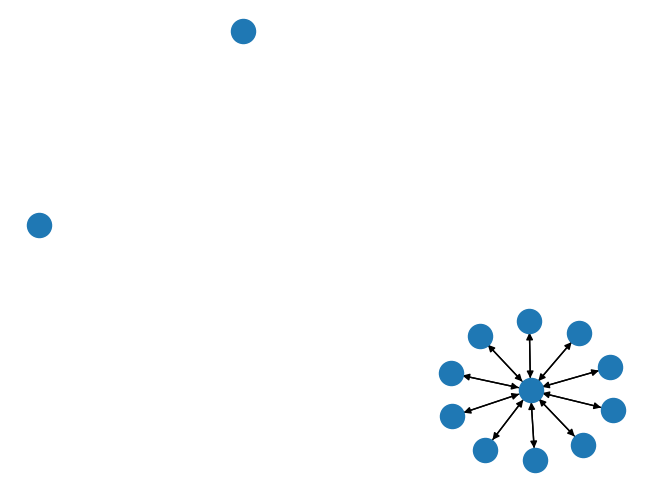

In [40]:
import networkx as nx
nx.draw(pickle.loads(pickle.dumps(old_train_sample['graphs'][0]))[('node', 'dialog', 'node')].cpu().to_networkx())

In [ ]:
nx.draw(old_train_sample['graphs'][0][('node', 'entity', 'node')].cpu().to_networkx())

In [ ]:
nx.draw(old_train_sample['graphs'][0][('node', 'speaker', 'node')].cpu().to_networkx())

In [33]:
tokenizer.convert_ids_to_tokens(old_train_sample['input_ids'][2].cpu().numpy().tolist())

['[CLS]',
 'speaker',
 '1',
 ':',
 'hey',
 ',',
 'sophie',
 '!',
 'speaker',
 '2',
 ':',
 'hey',
 ',',
 'ra',
 '##ch',
 '!',
 '[unused1]',
 ':',
 'hey',
 '.',
 'speaker',
 '2',
 ':',
 'hey',
 '.',
 'speaker',
 '1',
 ':',
 'thanks',
 'for',
 'lunch',
 ',',
 'chandler',
 '.',
 'y',
 "'",
 'know',
 ',',
 'you',
 'didn',
 "'",
 't',
 'have',
 'to',
 'walk',
 'me',
 'all',
 'the',
 'way',
 'back',
 'up',
 'here',
 '.',
 '[unused1]',
 ':',
 'oh',
 ',',
 'that',
 "'",
 's',
 '-',
 'that',
 "'",
 's',
 'okay',
 ',',
 'no',
 'problem',
 '.',
 'speaker',
 '1',
 ':',
 'honey',
 'um',
 ',',
 'honey',
 ',',
 'you',
 'do',
 'realise',
 'that',
 'we',
 'don',
 "'",
 't',
 'keep',
 'the',
 'women',
 "'",
 's',
 'linger',
 '##ie',
 'here',
 'in',
 'the',
 'office',
 '?',
 '[unused1]',
 ':',
 'yes',
 ',',
 'i',
 'realise',
 'that',
 '.',
 'speaker',
 '1',
 ':',
 'summer',
 'catalogue',
 '!',
 '[unused1]',
 ':',
 'that',
 "'",
 's',
 'the',
 'stuff',
 '!',
 '[SEP]',
 '[unused1]',
 '[SEP]',
 'honey',
 '[S

In [34]:
old_train_sample['graphs'][0]==old_train_sample['graphs'][0]

True

In [35]:
v = old_train_sample['graphs'][0]
v2 = old_train_sample['graphs'][0]